In [1]:
import sys

sys.path.append('../../')

# from metaheuristics import DifferentialEvolution
import src.config as config
import src.utils as utils
import src.agents as agents
# from src.metaheuristics import DifferentialEvolution

import src.synergy as synergy

import numpy as np
import matplotlib.pyplot as plt

In [2]:
from src.synergy import Synergy

## High runs(1000), Low iters(10)

In [12]:
from src.metaheuristics import DifferentialEvolution, ArtificialBeeColony, WaterCycleAlgorithm, ParticleSwarmOptimization

runs = np.int32(1e3)
iters = np.int32(10)

# See https://www.semanticscholar.org/paper/Good-Parameters-for-Differential-Evolution-Pedersen/48aa36e1496c56904f9f6dfc15323e0c45e34a4c

diff_weight = np.float32(0.9426)
cr_rate = np.float32(0.6607)
n_population = np.int32(28)

de = DifferentialEvolution(
    search=config.search,
    population_size=n_population,
    diff_weight=diff_weight,
    crossover_rate=cr_rate
)

# Check https://www.researchgate.net/profile/Mohamed_Mourad_Lafifi/post/Which-is-the-best-swarm-size-in-PSO/attachment/5b5b6f85b53d2f89289c14e1/AS%3A653084896288769%401532718981208/download/Good+Parameters+for+Particle+Swarm+Optimization.pdf

inertia = np.float32(0.7298)
cognitive = np.float32(1.4962)
social = np.float32(1.4962)

pso = ParticleSwarmOptimization(
    search=config.search,
    population_size=n_population,
    inertia=inertia,
    cognitive=cognitive,
    social=social
)

# See https://www.sciencedirect.com/science/article/pii/S0141029617315493

abc = ArtificialBeeColony(
    search=config.search,
    population_size=np.int32(25),
    max_trials=np.int32(100),  # paper
)

# See https://www.sciencedirect.com/science/article/pii/S1568494614005791?via%3Dihub

wca = WaterCycleAlgorithm(
    search=config.search,
    population_size=np.int32(25),
    max_iters=np.int32(1e3),
    n_sr=np.int32(5),  # paper, small rivers + sea proportionally to population size
    d_max=np.float32(1e-4),  # paper
)

# Run the algorithm for N iterations.
# n_iterations = np.int32(2000)

synergy = Synergy(
    metaheuristics=[de, pso, abc, wca],
    search=config.search,
    runs=runs,
    iterations=iters,
    convergence_criteria=0,  # don't converge  --> run 10 times
)

# Call the synergy metaheuristic.
synergy_1_st = synergy.optimize()

# Get the best agent.
best_agent = synergy.best_agent

# print the best agent.
print(f'Best agent: {best_agent} @ position {best_agent.position} with fitness {best_agent.fitness}')

Best agent: Agent -1 @ position [ 0.06558887 -0.01980047  0.9736      0.98530229  0.00282184 -1.00010793
  0.99953684 -1.05448563 -0.07998245  1.01587988] with fitness 9.035475997194993


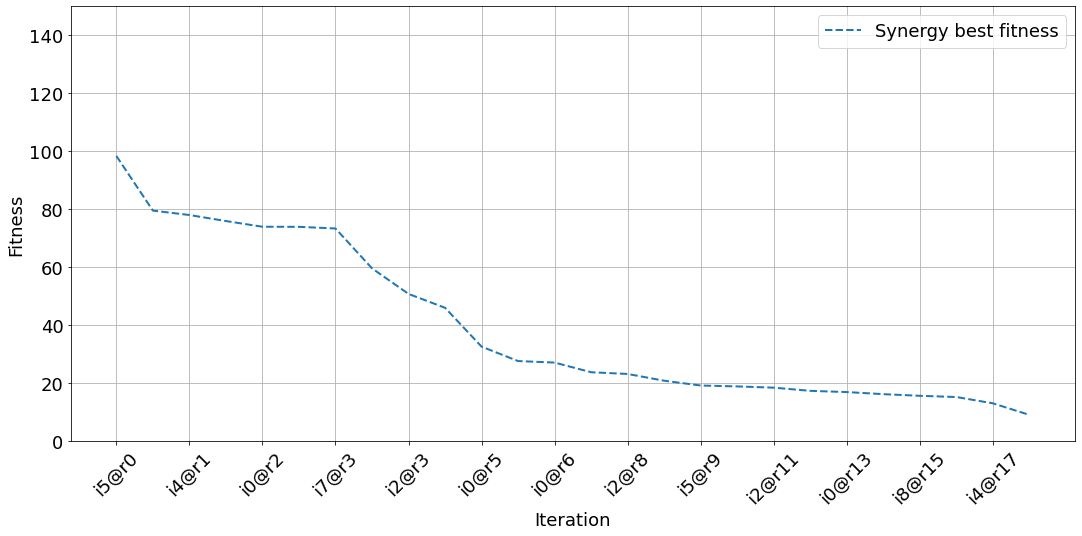

In [26]:
# Plot the evolution of the best agents' fitness over time for each metaheuristic.

fig, ax = plt.subplots(1, 1, figsize=(18, 8))

synergy_2_ft_trace = np.array([t['fitness'] for t in synergy_1_st['trace'].trace])
synergy_2_xpos_trace = [f'i{t["iteration"]}@r{t["run"]}' for t in synergy_1_st['trace'].trace]

# ax.plot(de_ft_trace, label='DE', linestyle='--', linewidth=2)
ax.plot(synergy_2_ft_trace, label='Synergy best fitness', linestyle='--', linewidth=2)

ax.legend(loc='best', fontsize=18)
ax.grid(True)
ax.set_xlabel('Iteration', fontsize=18)
ax.set_ylabel('Fitness', fontsize=18)
ax.set_ylim(bottom=0, top=150)

# Set x ticks with de_xpos_trace.
ax.set_xticks(np.arange(len(synergy_2_xpos_trace)))

# Set x ticks labels.
ax.set_xticklabels(synergy_2_xpos_trace, rotation=45)

# Limit the number of x ticks.
ax.locator_params(axis='x', nbins=15)

# Big font size.
ax.tick_params(axis='both', which='major', labelsize=18)

fig.savefig('synergy_1_1.png', dpi=300)

## Average runs & iters (100 of each)

In [30]:
from src.metaheuristics import DifferentialEvolution, ArtificialBeeColony, WaterCycleAlgorithm, ParticleSwarmOptimization

runs = np.int32(100)
iters = np.int32(100)

# See https://www.semanticscholar.org/paper/Good-Parameters-for-Differential-Evolution-Pedersen/48aa36e1496c56904f9f6dfc15323e0c45e34a4c

diff_weight = np.float32(0.9426)
cr_rate = np.float32(0.6607)
n_population = np.int32(28)

de = DifferentialEvolution(
    search=config.search,
    population_size=n_population,
    diff_weight=diff_weight,
    crossover_rate=cr_rate
)

# Check https://www.researchgate.net/profile/Mohamed_Mourad_Lafifi/post/Which-is-the-best-swarm-size-in-PSO/attachment/5b5b6f85b53d2f89289c14e1/AS%3A653084896288769%401532718981208/download/Good+Parameters+for+Particle+Swarm+Optimization.pdf

inertia = np.float32(0.7298)
cognitive = np.float32(1.4962)
social = np.float32(1.4962)

pso = ParticleSwarmOptimization(
    search=config.search,
    population_size=n_population,
    inertia=inertia,
    cognitive=cognitive,
    social=social
)

# See https://www.sciencedirect.com/science/article/pii/S0141029617315493

abc = ArtificialBeeColony(
    search=config.search,
    population_size=np.int32(25),
    max_trials=np.int32(100),  # paper
)

# See https://www.sciencedirect.com/science/article/pii/S1568494614005791?via%3Dihub

wca = WaterCycleAlgorithm(
    search=config.search,
    population_size=np.int32(25),
    max_iters=np.int32(1e3),
    n_sr=np.int32(5),  # paper, small rivers + sea proportionally to population size
    d_max=np.float32(1e-4),  # paper
)

# Run the algorithm for N iterations.
# n_iterations = np.int32(2000)

synergy = Synergy(
    metaheuristics=[de, pso, abc, wca],
    search=config.search,
    runs=100,
    iterations=100,
    convergence_criteria=0,  # don't converge  --> run 10 times
)

# Call the synergy metaheuristic.
synergy_2_st = synergy.optimize()

# Get the best agent.
best_agent = synergy.best_agent

# print the best agent.
print(f'Best agent: {best_agent} @ position {best_agent.position} with fitness {best_agent.fitness}')

Best agent: Agent -1 @ position [ 4.28417076e-02 -2.80537138e-02 -1.33332145e-02  1.03111149e+00
  3.80208396e-03 -9.98575888e-01  1.91901463e-02 -1.52364603e-04
  3.21845809e-02 -1.87631933e-03] with fitness 3.0854815490753107


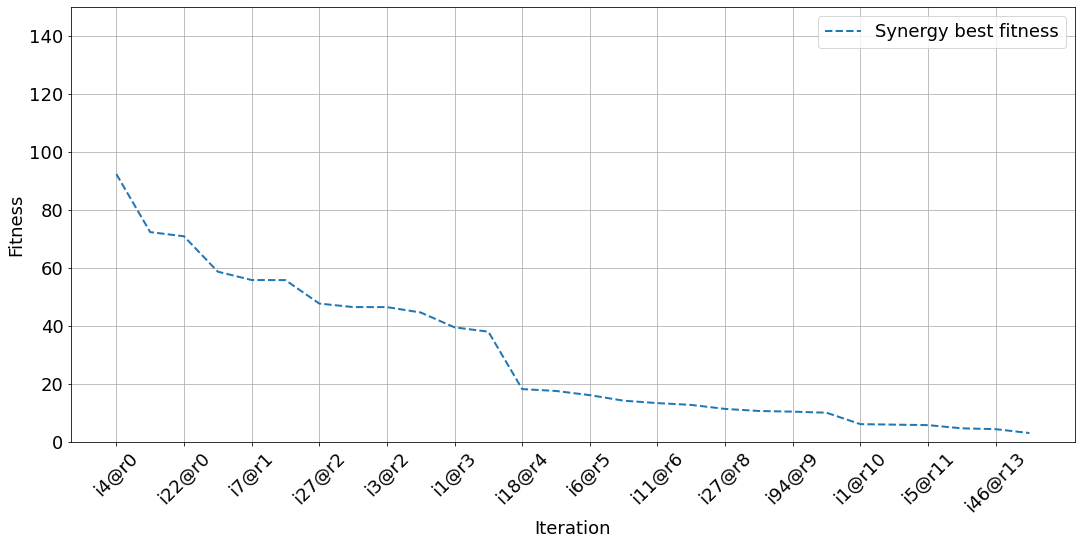

In [34]:
# Plot the evolution of the best agents' fitness over time for each metaheuristic.

fig, ax = plt.subplots(1, 1, figsize=(18, 8))

synergy_2_ft_trace = np.array([t['fitness'] for t in synergy_2_st['trace'].trace])
synergy_2_xpos_trace = [f'i{t["iteration"]}@r{t["run"]}' for t in synergy_2_st['trace'].trace]

# ax.plot(de_ft_trace, label='DE', linestyle='--', linewidth=2)
ax.plot(synergy_2_ft_trace, label='Synergy best fitness', linestyle='--', linewidth=2)

ax.legend(loc='best', fontsize=18)
ax.grid(True)
ax.set_xlabel('Iteration', fontsize=18)
ax.set_ylabel('Fitness', fontsize=18)
ax.set_ylim(bottom=0, top=150)

# Set x ticks with de_xpos_trace.
ax.set_xticks(np.arange(len(synergy_2_xpos_trace)))

# Set x ticks labels.
ax.set_xticklabels(synergy_2_xpos_trace, rotation=45)

# Limit the number of x ticks.
ax.locator_params(axis='x', nbins=15)

# Big font size.
ax.tick_params(axis='both', which='major', labelsize=18)

fig.savefig('synergy_1_2.png', dpi=300)

## Low runs(10), High iters(1000)

In [16]:
from src.metaheuristics import DifferentialEvolution, ArtificialBeeColony, WaterCycleAlgorithm, ParticleSwarmOptimization

runs = np.int32(10)
iters = np.int32(1000)

# See https://www.semanticscholar.org/paper/Good-Parameters-for-Differential-Evolution-Pedersen/48aa36e1496c56904f9f6dfc15323e0c45e34a4c

diff_weight = np.float32(0.9426)
cr_rate = np.float32(0.6607)
n_population = np.int32(28)

de = DifferentialEvolution(
    search=config.search,
    population_size=n_population,
    diff_weight=diff_weight,
    crossover_rate=cr_rate
)

# Check https://www.researchgate.net/profile/Mohamed_Mourad_Lafifi/post/Which-is-the-best-swarm-size-in-PSO/attachment/5b5b6f85b53d2f89289c14e1/AS%3A653084896288769%401532718981208/download/Good+Parameters+for+Particle+Swarm+Optimization.pdf

inertia = np.float32(0.7298)
cognitive = np.float32(1.4962)
social = np.float32(1.4962)

pso = ParticleSwarmOptimization(
    search=config.search,
    population_size=n_population,
    inertia=inertia,
    cognitive=cognitive,
    social=social
)

# See https://www.sciencedirect.com/science/article/pii/S0141029617315493

abc = ArtificialBeeColony(
    search=config.search,
    population_size=np.int32(25),
    max_trials=np.int32(100),  # paper
)

# See https://www.sciencedirect.com/science/article/pii/S1568494614005791?via%3Dihub

wca = WaterCycleAlgorithm(
    search=config.search,
    population_size=np.int32(25),
    max_iters=np.int32(1e3),
    n_sr=np.int32(5),  # paper, small rivers + sea proportionally to population size
    d_max=np.float32(1e-4),  # paper
)

# Run the algorithm for N iterations.
# n_iterations = np.int32(2000)

synergy = Synergy(
    metaheuristics=[de, pso, abc, wca],
    search=config.search,
    runs=runs,
    iterations=iters,
    convergence_criteria=0,  # don't converge  --> run 10 times
)

# Call the synergy metaheuristic.
synergy_3_st = synergy.optimize()

# Get the best agent.
best_agent = synergy.best_agent

# print the best agent.
print(f'Best agent: {best_agent} @ position {best_agent.position} with fitness {best_agent.fitness}')

Best agent: Agent -1 @ position [ 0.96131021  0.01708116 -0.06286644 -0.98340228  0.06474051  1.02262823
  0.01334863 -0.03096481  1.04596319 -0.05768309] with fitness 7.424301623011048


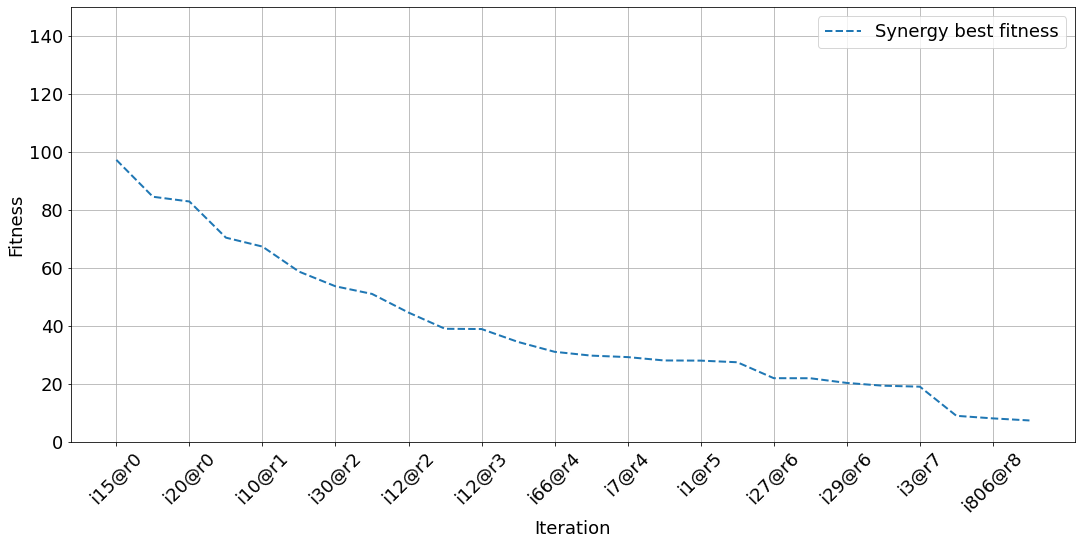

In [21]:
# Plot the evolution of the best agents' fitness over time for each metaheuristic.

fig, ax = plt.subplots(1, 1, figsize=(18, 8))

synergy_2_ft_trace = np.array([t['fitness'] for t in synergy_3_st['trace'].trace])
synergy_2_xpos_trace = [f'i{t["iteration"]}@r{t["run"]}' for t in synergy_3_st['trace'].trace]

# ax.plot(de_ft_trace, label='DE', linestyle='--', linewidth=2)
ax.plot(synergy_2_ft_trace, label='Synergy best fitness', linestyle='--', linewidth=2)

ax.legend(loc='best', fontsize=18)
ax.grid(True)
ax.set_xlabel('Iteration', fontsize=18)
ax.set_ylabel('Fitness', fontsize=18)
ax.set_ylim(bottom=0, top=150)

# Set x ticks with de_xpos_trace.
ax.set_xticks(np.arange(len(synergy_2_xpos_trace)))

# Set x ticks labels.
ax.set_xticklabels(synergy_2_xpos_trace, rotation=45)

# Limit the number of x ticks.
ax.locator_params(axis='x', nbins=15)

# Big font size.
ax.tick_params(axis='both', which='major', labelsize=18)

fig.savefig('synergy_1_3.png', dpi=300)